# NOMAD Repository Tutorial

This notebook demonstrates how to access and use the NOMAD (Novel Materials Discovery) repository, an open materials science database.

## What is NOMAD?

NOMAD is a large-scale repository and archive for materials science data, particularly computational results. It contains:
- DFT calculations
- Crystal structures
- Electronic properties
- Thermodynamic data
- And much more!

## Resources

- **Website**: https://nomad-lab.eu/
- **Documentation**: https://nomad-lab.eu/prod/v1/docs/
- **API Documentation**: https://nomad-lab.eu/prod/rae/api/

## Installation

Most packages are pre-installed in Google Colab. If needed, install additional packages:

```bash
pip install nomad-lab
```

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sp8rks/MaterialsInformatics/blob/spring-2026-course-updates/worked_examples/NOMAD_example/NOMAD_tutorial.ipynb)

## Google Colab Setup

This notebook is designed to run on Google Colab with minimal setup required.

Most required packages (requests, pandas, numpy, matplotlib) are pre-installed in Google Colab.

In [ ]:
# Google Colab Environment Check
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab")
except:
    IN_COLAB = False
    print("Running in local environment")

Running in Google Colab


In [ ]:
# Install required packages
# Note: requests, pandas, numpy, matplotlib are pre-installed in Colab
# We only need to install nomad-lab if required
# Using regular pip to avoid build issues
!pip install nomad-lab --quiet 2>/dev/null || echo "nomad-lab installation skipped"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.3/340.3 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.8/306.8 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [ ]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

## NOMAD API Access

NOMAD provides multiple interfaces for data access:

### 1. Web Interface (Recommended for Exploration)
The easiest way to explore NOMAD data is through the web GUI:

- **Search Interface**: https://nomad-lab.eu/prod/v1/gui/search/entries
- **Features**: Interactive search, filtering, visualization, and data export
- **Best for**: Exploring materials, browsing entries, downloading specific datasets

### 2. Repository API (RESTful)
The Repository API provides programmatic access to NOMAD data.

- **Base URL**: `https://nomad-lab.eu/prod/rae/api`
- **Main Endpoint**: `/repo/` - Search and filter materials entries
- **Method**: GET or POST
- **Key Parameters**:
  - `atoms`: Filter by elements (e.g., `atoms=Ge`)
  - `formula`: Search by chemical formula (e.g., `formula=GaN`)
  - `per_page`: Number of results per page
  - `page`: Page number for pagination

**Note**: The API may return aggregations/statistics rather than full entry data. For detailed material data, use the web interface or access specific entries by ID.

**Example Query**:
```python
params = {'atoms': 'Si', 'per_page': 10}
response = requests.get('https://nomad-lab.eu/prod/rae/api/repo/', params=params)
```

### 3. OPTIMADE API
NOMAD supports the OPTIMADE standard for cross-database queries.

- **Documentation**: https://www.optimade.org/
- **Note**: OPTIMADE availability may vary by NOMAD instance

**For this tutorial**: We demonstrate the Repository API structure, but recommend using the web interface for actual data exploration and downloads.

In [ ]:
# NOMAD API base URL
BASE_URL = "https://nomad-lab.eu/prod/rae/api"

# Headers for requests (only Accept header for GET requests)
headers = {
    'Accept': 'application/json'
}

### Troubleshooting API Issues

**Common Issues:**

1. **Empty Data Array**: The `/repo/` endpoint may return aggregations/statistics but not actual entry data. This appears to be current API behavior.
   - **Solution**: Use the NOMAD web interface at https://nomad-lab.eu/prod/v1/gui/search/entries
   - **Alternative**: Access specific entries if you have their entry_ids

2. **504 Gateway Timeout**: The server is overloaded. Wait and retry in a few minutes.

3. **422 Unprocessable Entity**: Query format issue. Check the query structure.

4. **OPTIMADE 404**: The OPTIMADE endpoint may not be available on all NOMAD instances.

**Recommended Approach:**
For this tutorial, we recommend using the NOMAD web GUI for interactive exploration:
- **Search**: https://nomad-lab.eu/prod/v1/gui/search/entries
- **Explore**: Click on entries to view detailed data
- **Download**: Export data in various formats (JSON, CSV, etc.)

## Simple Search: Find Materials

Let's search for germanium-containing materials

### Testing the API

First, let's test if the API is working with a simple query.

**Note:** If the test returns a count but empty data:
- The API may require authentication or specific parameters
- Some entries may be restricted or not publicly accessible
- The API response structure may have changed
- Try checking the full response JSON to see what's included

In [ ]:
# Test simple query - just get some entries
# Debug the actual response structure

try:
    response = requests.get(
        f"{BASE_URL}/repo/",
        params={'per_page': 5}
    )

    print(f"Test query status: {response.status_code}")
    print(f"Request URL: {response.url}\n")

    if response.status_code == 200:
        test_data = response.json()

        # Show what's actually in the response
        print(f"Response keys: {list(test_data.keys())}")

        # Check each key to see what contains the entries
        for key in test_data.keys():
            value = test_data[key]
            if isinstance(value, list):
                print(f"  '{key}': list with {len(value)} items")
                if len(value) > 0:
                    print(f"    First item type: {type(value[0])}")
                    if isinstance(value[0], dict):
                        print(f"    First item keys: {list(value[0].keys())[:10]}")
            elif isinstance(value, dict):
                print(f"  '{key}': dict with keys: {list(value.keys())[:5]}")
            else:
                print(f"  '{key}': {type(value).__name__}")

        # Try to find the entries
        print("\n" + "="*60)
        if 'results' in test_data and isinstance(test_data['results'], list):
            results = test_data['results']
            print(f"Found entries in 'results': {len(results)} entries")
            if len(results) > 0:
                first = results[0]
                print(f"\nFirst entry ID: {first.get('upload_id', 'N/A')}")
                print(f"First entry keys: {list(first.keys())[:15]}")
        elif isinstance(test_data, list):
            print(f"Response is directly a list: {len(test_data)} entries")
            if len(test_data) > 0:
                print(f"First entry keys: {list(test_data[0].keys())[:15]}")
        else:
            print("Could not locate entries in response")
            print("\nFull response structure:")
            print(json.dumps(test_data, indent=2)[:1500])

    elif response.status_code == 504:
        print("Gateway timeout")
    else:
        print(f"Error: {response.text[:500]}")

except Exception as e:
    print(f"Exception: {e}")
    import traceback
    traceback.print_exc()

Test query status: 200
Request URL: https://nomad-lab.eu/prod/rae/api/repo/?per_page=5

Response keys: ['statistics', 'date_histogram', 'pagination', 'results', 'code']
  'statistics': dict with keys: ['total']
  'date_histogram': bool
  'pagination': dict with keys: ['total', 'page', 'per_page']
  'results': list with 5 items
    First item type: <class 'dict'>
    First item keys: ['upload_id', 'calc_id', 'calc_hash', 'mainfile', 'files', 'raw_id', 'domain', 'published', 'processed', 'last_processing']
  'code': dict with keys: ['repo_url', 'python', 'curl', 'clientlib']

Found entries in 'results': 5 entries

First entry ID: -7NY-trlQDG9ovWBvtGiaA
First entry keys: ['upload_id', 'calc_id', 'calc_hash', 'mainfile', 'files', 'raw_id', 'domain', 'published', 'processed', 'last_processing', 'nomad_version', 'nomad_commit', 'parser_name', 'comment', 'uploader']


In [ ]:
# Search for Ge-containing materials
# Using the 'atoms' parameter to filter by element

params = {
    'atoms': 'Ge',
    'per_page': 10
}

response = requests.get(f"{BASE_URL}/repo/", params=params)

print(f"Response status: {response.status_code}")
print(f"Request URL: {response.url}")

if response.status_code == 200:
    data = response.json()

    print(f"\nResponse keys: {list(data.keys())}")

    pagination = data.get('pagination', {})
    total = pagination.get('total', 0)
    print(f"Total entries found: {total}")

    # Try different keys to find entries
    entries = data.get('results', data.get('data', []))
    print(f"Entries array length: {len(entries)}")

    if len(entries) > 0:
        print(f"\nShowing {len(entries)} results:")
        for entry in entries:
            entry_id = entry.get('upload_id', 'N/A')

            # Try to get formula and atomic_density
            formula = 'N/A'
            atomic_density = None

            if 'dft' in entry and isinstance(entry['dft'], dict):
                if 'optimade' in entry['dft']:
                    formula = entry['dft']['optimade'].get('chemical_formula_reduced', 'N/A')

            # Check for atomic_density in properties
            if 'encyclopedia' in entry and isinstance(entry.get('encyclopedia'), dict):
                if 'properties' in entry['encyclopedia']:
                    atomic_density = entry['encyclopedia']['properties'].get('atomic_density', None)

            density_str = f"{atomic_density:.4f}" if atomic_density else "N/A"
            print(f"  {entry_id}: {formula} (density: {density_str})")
    else:
        print(f"\nFound {total} total entries but entries array is empty!")
        print("\nNote: The NOMAD API may not return entry data by default.")
        print("The response includes aggregations and statistics, but not individual entries.")
        print("\nUse the web interface: https://nomad-lab.eu/prod/v1/gui/search/entries")

        # Show what IS in the response
        print(f"\nResponse contains: {list(data.keys())}")

elif response.status_code == 400:
    print(f"\n400 Bad Request: {response.text[:500]}")
else:
    print(f"\nError {response.status_code}: {response.text[:500]}")

Response status: 200
Request URL: https://nomad-lab.eu/prod/rae/api/repo/?atoms=Ge&per_page=10

Response keys: ['statistics', 'date_histogram', 'pagination', 'results', 'code']
Total entries found: 423844
Entries array length: 10

Showing 10 results:
  4xjU-M2pT4yAaFpKIT0ZPg: Ge108Si108 (density: N/A)
  4xjU-M2pT4yAaFpKIT0ZPg: Ge2P4Zn2 (density: 51400508852693701691562786816.0000)
  4xjU-M2pT4yAaFpKIT0ZPg: Cd2Ge2P4 (density: 44675381151602870491390410752.0000)
  4xjU-M2pT4yAaFpKIT0ZPg: As4Cd2Ge2 (density: 39616693311271348514320285696.0000)
  4xjU-M2pT4yAaFpKIT0ZPg: Ge2P4Zn2 (density: 51400508852693701691562786816.0000)
  4xjU-M2pT4yAaFpKIT0ZPg: Ge108Mg216 (density: N/A)
  4xjU-M2pT4yAaFpKIT0ZPg: As256Cd128Ge128 (density: N/A)
  4xjU-M2pT4yAaFpKIT0ZPg: Ge8Si8 (density: 46589566966896437254835666944.0000)
  4xjU-M2pT4yAaFpKIT0ZPg: Cd128Ge128P256 (density: N/A)
  4xjU-M2pT4yAaFpKIT0ZPg: C8Ge8 (density: 83363576727843846484876328960.0000)


## Search for Specific Compound: GaN

Let's find all entries for GaN (gallium nitride - an important semiconductor material used in LEDs and high-power electronics)

In [ ]:
# Search for GaN using the formula parameter

params = {
    'formula': 'GaN',
    'per_page': 20
}

response = requests.get(f"{BASE_URL}/repo/", params=params)

print(f"Response status: {response.status_code}")
print(f"Request URL: {response.url}")

if response.status_code == 200:
    data = response.json()
    pagination = data.get('pagination', {})
    total = pagination.get('total', 0)
    print(f"Found {total} GaN entries")

    # Try different keys to find entries
    entries = data.get('results', data.get('data', []))
    print(f"Entries array length: {len(entries)}")

    if len(entries) > 0:
        # Extract data into a list
        gan_data = []
        for entry in entries:
            try:
                entry_id = entry.get('upload_id')
                formula = 'N/A'
                space_group = None
                atomic_density = None

                if 'dft' in entry and isinstance(entry['dft'], dict):
                    if 'optimade' in entry['dft']:
                        optimade_data = entry['dft']['optimade']
                        formula = optimade_data.get('chemical_formula_reduced', 'N/A')

                if 'encyclopedia' in entry and isinstance(entry.get('encyclopedia'), dict):
                    if 'properties' in entry['encyclopedia']:
                        atomic_density = entry['encyclopedia']['properties'].get('atomic_density', None)
                        space_group = entry['encyclopedia']['material']['bulk'].get('space_group_number', None)

                gan_data.append({
                    'entry_id': entry_id,
                    'formula': formula,
                    'space_group': space_group,
                    'atomic_density': atomic_density
                })
            except Exception as e:
                continue

        df_gan = pd.DataFrame(gan_data)
        print(f"\nExtracted {len(df_gan)} GaN entries:")
        if len(df_gan) > 0:
            print(df_gan.head(10))
    else:
        print(f"\nAPI found {total} GaN entries but returned no entry data.")
        print("\nWorkaround: Use the NOMAD web interface to explore GaN data:")
        print("   1. Go to: https://nomad-lab.eu/prod/v1/gui/search/entries")
        print("   2. Search for: formula=GaN")
        print("   3. Browse entries and download data as needed")
        print("\n   Or construct the search URL directly:")
        print("   https://nomad-lab.eu/prod/v1/gui/search/entries?formula=GaN")

        # Create empty dataframe for later cells
        gan_data = []
        df_gan = pd.DataFrame(columns=['formula', 'space_group', 'atomic_density'])

elif response.status_code == 504:
    print("Gateway timeout - try again in a few moments.")
    gan_data = []
    df_gan = pd.DataFrame(columns=['formula', 'space_group', 'atomic_density'])
else:
    print(f"Error: {response.text[:500]}")
    gan_data = []
    df_gan = pd.DataFrame(columns=['formula', 'space_group', 'atomic_density'])

Response status: 200
Request URL: https://nomad-lab.eu/prod/rae/api/repo/?formula=GaN&per_page=20
Found 1852 GaN entries
Entries array length: 20

Extracted 17 GaN entries:
                 entry_id formula  space_group  atomic_density
0  4xjU-M2pT4yAaFpKIT0ZPg     GaN          225    1.058510e+29
1  4xjU-M2pT4yAaFpKIT0ZPg     GaN          225    1.058510e+29
2  4xjU-M2pT4yAaFpKIT0ZPg     GaN          216    8.704545e+28
3  4xjU-M2pT4yAaFpKIT0ZPg     GaN          216    8.704545e+28
4  o02al1UpTqWi7vTk6DhOTA     GaN          216    8.510178e+28
5  1CSoHDpnQIa_yeRY8MQP7w     GaN          216    8.510173e+28
6  1CSoHDpnQIa_yeRY8MQP7w     GaN          216    8.608159e+28
7  8zYl6tWPRZSjn6CcgDMf6w     GaN          216    8.510009e+28
8  rlJgZQ4wS3WdDNt9CmclMg     GaN          216    8.510009e+28
9  uQuQ_QDOSA27LJXr_BMWrw     GaN          216    8.510009e+28


## Search with Property Filters

Find materials with specific properties (e.g., atomic density)

In [ ]:
# Search for Ge-containing materials and extract atomic density
# Note: Property-based filtering may require fetching entries and filtering locally

params = {
    'atoms': 'Ge',
    'per_page': 100  # Get more entries to filter locally
}

response = requests.get(f"{BASE_URL}/repo/", params=params)

print(f"Response status: {response.status_code}")

if response.status_code == 200:
    data = response.json()
    pagination = data.get('pagination', {})
    total = pagination.get('total', 0)
    print(f"Found {total} Ge-containing entries")

    # Try different keys to find entries
    entries = data.get('results', data.get('data', []))
    print(f"Retrieved {len(entries)} entries")

    # Extract atomic density data
    atomic_densities = []
    formulas = []

    for entry in entries:
        try:
            # Try to get formula
            formula = 'Unknown'
            if 'dft' in entry and 'optimade' in entry['dft']:
                formula = entry['dft']['optimade'].get('chemical_formula_reduced', 'Unknown')

            # Try to get atomic_density from encyclopedia
            atomic_density = None
            if 'encyclopedia' in entry:
                enc_data = entry['encyclopedia']
                if 'properties' in enc_data:
                    atomic_density = enc_data['properties'].get('atomic_density', None)

            # Collect all atomic densities
            if atomic_density is not None:
                atomic_densities.append(atomic_density)
                formulas.append(formula)
        except:
            continue

    print(f"Extracted {len(atomic_densities)} Ge materials with atomic density data")

    if len(atomic_densities) > 0:
        print(f"\nSample formulas with atomic densities:")
        for i, (formula, density) in enumerate(zip(formulas[:5], atomic_densities[:5])):
            print(f"  {formula}: {density:.4f} atoms/Å³")
    else:
        print("\nNote: No atomic density data found.")
        print("Property data may not be available for all entries, or may require")
        print("accessing the full archive data for each entry individually.")
elif response.status_code == 400:
    print(f"Bad Request - Error: {response.text[:500]}")
else:
    print(f"Error: {response.text[:500]}")

Response status: 200
Found 423844 Ge-containing entries
Retrieved 100 entries
Extracted 63 Ge materials with atomic density data

Sample formulas with atomic densities:
  Ge2P4Zn2: 51400508852693701691562786816.0000 atoms/Å³
  Cd2Ge2P4: 44675381151602870491390410752.0000 atoms/Å³
  As4Cd2Ge2: 39616693311271348514320285696.0000 atoms/Å³
  Ge2P4Zn2: 51400508852693701691562786816.0000 atoms/Å³
  Ge8Si8: 46589566966896437254835666944.0000 atoms/Å³


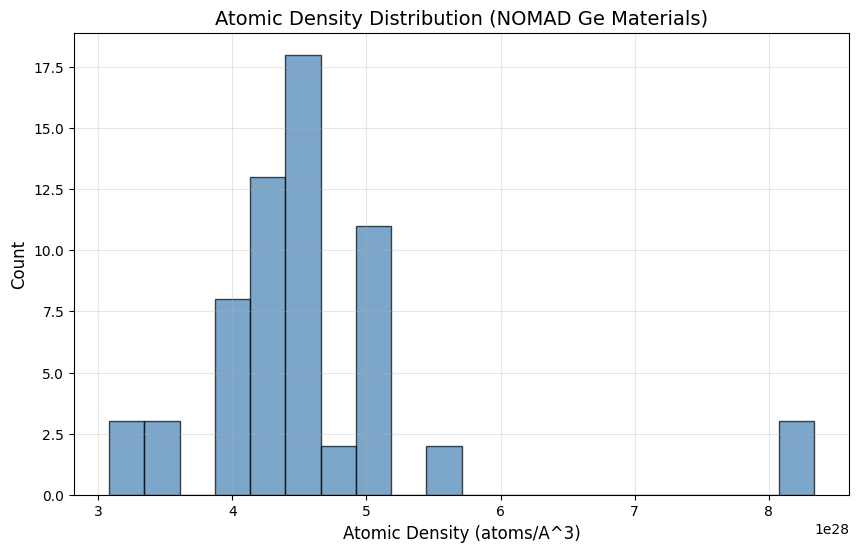


Atomic Density Statistics:
  Mean: 46022282208898822938218725376.0000 atoms/A^3
  Median: 44675381151602861695297388544.0000 atoms/A^3
  Std Dev: 9807784409298812922572570624.0000 atoms/A^3
  Min: 30818221860966561124943134720.0000 atoms/A^3
  Max: 83363576727843846484876328960.0000 atoms/A^3


In [ ]:
# Visualize atomic density distribution
if len(atomic_densities) > 0:
    plt.figure(figsize=(10, 6))
    plt.hist(atomic_densities, bins=20, edgecolor='black', alpha=0.7, color='steelblue')
    plt.xlabel('Atomic Density (atoms/A^3)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title('Atomic Density Distribution (NOMAD Ge Materials)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.show()

    # Statistics
    print(f"\nAtomic Density Statistics:")
    print(f"  Mean: {np.mean(atomic_densities):.4f} atoms/A^3")
    print(f"  Median: {np.median(atomic_densities):.4f} atoms/A^3")
    print(f"  Std Dev: {np.std(atomic_densities):.4f} atoms/A^3")
    print(f"  Min: {np.min(atomic_densities):.4f} atoms/A^3")
    print(f"  Max: {np.max(atomic_densities):.4f} atoms/A^3")
else:
    print("No atomic density data to visualize. Try adjusting the query parameters or element selection.")

## Comparing NOMAD with Materials Project

Key Differences:

| Feature | NOMAD | Materials Project |
|---------|-------|------------------|
| Data Type | All computational data | Curated DFT results |
| API Access | Limited (aggregations) | Full (with API key) |
| Web Interface | Excellent, full-featured | Excellent, full-featured |
| Data Volume | Very large (~millions) | Large (~150k) |
| Upload | Yes (open repository) | No (curated only) |
| Quality Control | Variable (raw data) | High (curated) |
| Standardization | Variable | Highly standardized |
| Best Interface | Web GUI | API or Web GUI |

### When to use NOMAD:
- You want access to raw calculation data
- You need to upload your own computational data
- You're looking for specific calculation types or methods
- You want to compare different computational approaches
- **Use the web interface for data exploration**

### When to use Materials Project:
- You need reliable, curated data via API
- You want standardized properties for screening
- You need thermodynamic data
- You're doing high-throughput computational screening
- **API provides full programmatic access**

### Practical Recommendation:
For both databases, the **web interface** provides the most reliable way to explore and download data. NOMAD's web interface at https://nomad-lab.eu/prod/v1/gui/search/entries offers excellent search, filtering, and export capabilities.

## Using OPTIMADE for Cross-Database Queries

OPTIMADE allows you to query multiple databases with the same syntax. Here's a simple example:

**Note:** The OPTIMADE endpoint may have limited availability or may require different query syntax than the RESTful API. The example below demonstrates the standard OPTIMADE query format.

In [ ]:
# Example OPTIMADE query to NOMAD
# OPTIMADE endpoint is separate from the main API

# Try multiple possible OPTIMADE endpoints
OPTIMADE_URLS = [
    "https://nomad-lab.eu/prod/rae/optimade/v1/structures",
    "https://nomad-lab.eu/prod/v1/api/v1/optimade/v1/structures",
    "https://nomad-lab.eu/prod/rae/api/optimade/v1/structures"
]

print("Testing OPTIMADE endpoints...")

for url in OPTIMADE_URLS:
    print(f"\nTrying: {url}")

    params = {
        'filter': 'elements HAS "Ge" AND elements HAS "O"',
        'page_limit': 5
    }

    response = requests.get(url, params=params)
    print(f"  Status: {response.status_code}")

    if response.status_code == 200:
        print(f"  This endpoint works!")
        optimade_data = response.json()

        print(f"  Response keys: {list(optimade_data.keys())}")
        num_results = len(optimade_data.get('data', []))
        print(f"  Returned {num_results} structures")

        if num_results > 0:
            print("\n  First few structures:")
            for struct in optimade_data.get('data', [])[:3]:
                formula = struct.get('attributes', {}).get('chemical_formula_reduced', 'N/A')
                struct_id = struct.get('id', 'N/A')
                print(f"    {struct_id}: {formula}")

            print("\nOPTIMADE working! Use this URL for OPTIMADE queries.")
            break
        else:
            print("  No data returned, trying simpler query...")
            simple_resp = requests.get(url, params={'page_limit': 3})
            if simple_resp.status_code == 200:
                simple_data = simple_resp.json()
                print(f"  Simple query returned {len(simple_data.get('data', []))} results")
    elif response.status_code == 404:
        print(f"  404 Not Found - endpoint doesn't exist")
    else:
        print(f"  Error: {response.text[:200]}")

print("\n" + "="*60)
print("Note: OPTIMADE may not be enabled on this NOMAD instance.")
print("Use the main Repository API (/repo/) for reliable access.")

Testing OPTIMADE endpoints...

Trying: https://nomad-lab.eu/prod/rae/optimade/v1/structures
  Status: 200
  This endpoint works!
  Response keys: ['data', 'meta', 'included', 'links']
  Returned 5 structures

  First few structures:
    _Dc9kC5X3MPQ4-pXsnPH1PDZjLIG: Ac2Ge2O6
    bf8Cdg63SE24JaHTrVAd07s7uMPg: Ac2Ge2O6
    ZXfTIWqejAJQdOsM4_pvcgSprhK0: Ac2Ge2O6

OPTIMADE working! Use this URL for OPTIMADE queries.

Note: OPTIMADE may not be enabled on this NOMAD instance.
Use the main Repository API (/repo/) for reliable access.


## Export Downloaded Data

In [ ]:
# Save the GaN data to CSV
if len(gan_data) > 0:
    df_gan.to_csv('nomad_gan_data.csv', index=False)
    print(f"Saved {len(df_gan)} GaN entries to nomad_gan_data.csv")

# Save atomic density data
if len(atomic_densities) > 0:
    df_density = pd.DataFrame({
        'formula': formulas,
        'atomic_density': atomic_densities
    })
    df_density.to_csv('nomad_atomic_density_data.csv', index=False)
    print(f"Saved {len(df_density)} atomic density entries to nomad_atomic_density_data.csv")

Saved 17 GaN entries to nomad_gan_data.csv
Saved 63 atomic density entries to nomad_atomic_density_data.csv


## Uploading Data to NOMAD

To upload data to NOMAD:

1. **Create an account** at https://nomad-lab.eu/
2. **Prepare your data** in a supported format (VASP, Quantum Espresso, etc.)
3. **Use the web interface** or API to upload

### Upload via Web Interface:
- Go to https://nomad-lab.eu/prod/v1/gui/uploads
- Click "New Upload"
- Drag and drop your calculation files
- Add metadata and publish

### Upload via API:
```python
# Requires authentication token
files = {'file': open('calculation.out', 'rb')}
response = requests.post(
    f"{BASE_URL}/uploads",
    headers={'Authorization': f'Bearer {token}'},
    files=files
)
```

**Note**: For HW1, you can use the staging server for testing uploads without affecting production data.

## Exercise: Explore NOMAD

Given the current API limitations (empty data arrays), here are recommended exercises:

### Using the Web Interface:

1. **Search for materials**: Go to https://nomad-lab.eu/prod/v1/gui/search/entries
   - Try searching for: GaN, TiO2, or other compounds
   - Apply filters: crystal system, space group, band gap range
   
2. **Explore entry details**: Click on any entry to view:
   - Crystal structure visualization
   - Electronic properties
   - Calculation metadata
   - Download options (JSON, archive, etc.)

3. **Export data**:
   - Select multiple entries
   - Export as CSV or JSON
   - Import into Python/pandas for analysis

### Using the API (if data becomes available):

1. Test different element combinations
2. Compare properties from multiple entries  
3. Create visualizations from exported data
4. Analyze statistics and aggregations returned by the API

### Challenge Projects:

**Challenge 1**: Download GaN data from the web interface and compare band gap values from different calculation methods (GGA, PBE, hybrid functionals, etc.)

**Challenge 2**: Explore materials in the same crystal system - compare their properties and identify trends

**Challenge 3**: Build a dataset of semiconductor materials and analyze their band gap distribution

In [ ]:
# Your code here
# Try your own search!


## Additional Resources

### NOMAD Resources
- **NOMAD Website**: https://nomad-lab.eu/
- **Documentation**: https://nomad-lab.eu/prod/v1/docs/
- **RESTful API Docs**: https://nomad-lab.eu/prod/v1/api/v1/extensions/docs
- **Tutorials**: https://nomad-lab.eu/prod/v1/docs/tutorials.html
- **GitHub**: https://github.com/nomad-coe

### OPTIMADE Resources
- **OPTIMADE Website**: https://www.optimade.org/
- **OPTIMADE Specification**: https://github.com/Materials-Consortia/OPTIMADE
- **Query Examples**: https://www.optimade.org/optimade-python-tools/
- **List of OPTIMADE Providers**: https://providers.optimade.org/